In [1]:
import numpy as np

from astropy import constants as c

import matplotlib as mpl
import matplotlib.pyplot as plt

from densitymodels import NFWDensityProfile, EinastoDensityProfile, PowerlawDensityProfile, ConstDensityProfile

mpl.rc('font', size=12)

## Galaxy Halo Models

See David Merritt, Alister W. Graham, Ben Moore, Juerg Diemand, and Balsa Terzic, "Empirical Models for Dark Matter Halos. I. Nonparametric Construction of Density Profiles and Comparison with Parametric Models," [Astron J.  132:2685–2700, 2006](https://iopscience.iop.org/article/10.1086/508988), [astro-ph/0509417](https://arxiv.org/abs/astro-ph/0509417).

In [2]:
def plot_profile(dens_profile, r):
    rho = dens_profile.density(r)
    mass, v = dens_profile.velocity(r, return_mass=True)

    fig, axes = plt.subplots(1,3, figsize=(14,4), sharex=True)

    ax = axes[0]
    ax.plot(r, rho)
    ax.set(xlabel=r'$r$ [kpc]',
           yscale='log',
           ylabel=r'$\rho(r)$ [M$_\odot$ kpc$^{-3}$]')

    ax = axes[1]
    ax.plot(r, mass)
    ax.set(xlabel=r'$r$ [kpc]',
           ylabel=r'$M(<r)$ [M$_\odot$]')

    ax = axes[2]
    ax.plot(r, v)
    ax.set(xlabel=r'$r$ [kpc]',
           ylabel=r'$v(r)$ [km s$^{-1}$]')

    fig.tight_layout()
    return fig

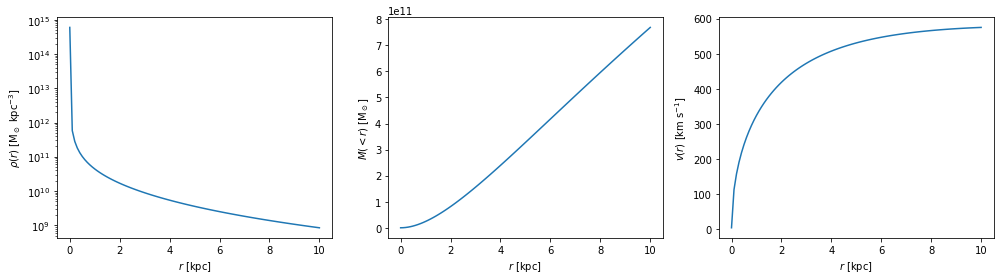

In [3]:
nfw = NFWDensityProfile('NFW', 1e10, 6)
r = np.linspace(1e-4, 10., 101)
fig = plot_profile(nfw, r)

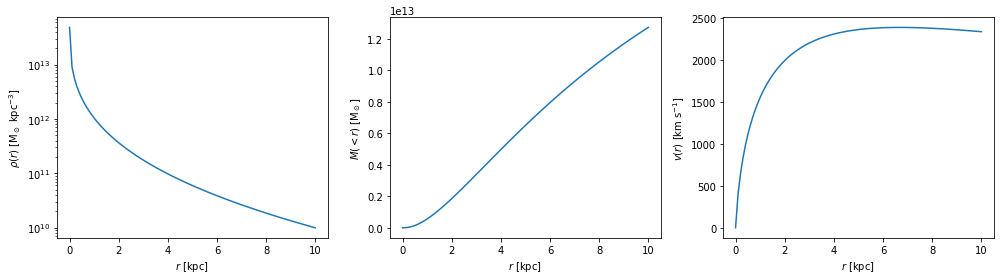

In [4]:
einasto = EinastoDensityProfile('Einasto', 1e10, 10., 3)
r = np.linspace(1e-4, 10., 101)
fig = plot_profile(einasto, r)

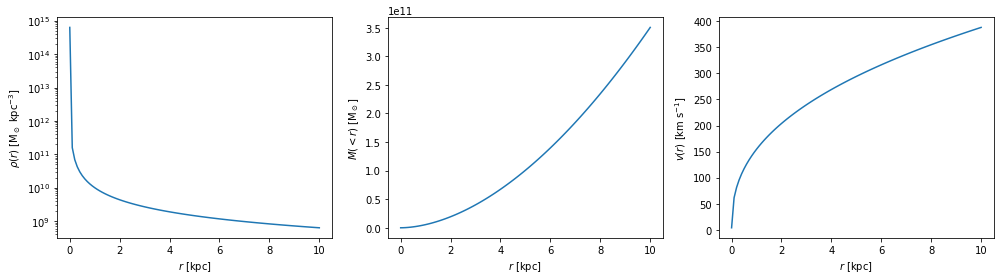

In [5]:
pl = PowerlawDensityProfile('Powerlaw', 1e10, -1.2)
r = np.linspace(1e-4, 10., 101)
fig = plot_profile(pl, r)

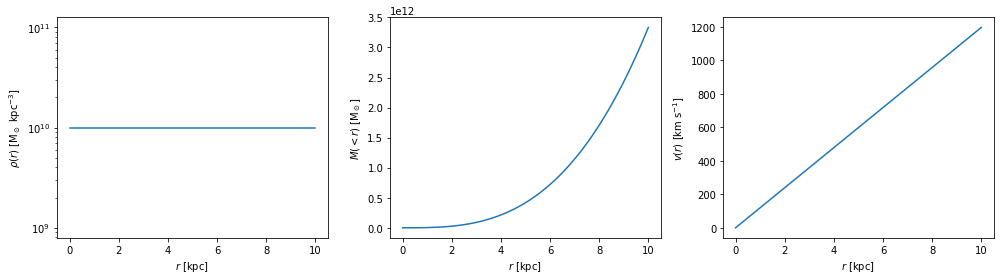

In [6]:
const = ConstDensityProfile('Constant', 1e10)
r = np.linspace(1e-4, 10., 101)
fig = plot_profile(const, r)